In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
wine_quality_df = pd.read_csv("winequality-white.csv",delimiter=';')

In [3]:
wine_quality_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
wine_quality_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wine_quality_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [6]:
train_df, test_df = train_test_split(wine_quality_df,
                                     test_size = 0.2,
                                     random_state = 42)

train_df.reset_index(drop = True,
                     inplace = True)
test_df.reset_index(drop = True,
                    inplace = True)
print("Training set: {}".format(train_df.shape))
print("Testing set: {}".format(test_df.shape))

Training set: (3918, 12)
Testing set: (980, 12)


C:\Users\Hp\Anaconda2\envs\ml_assignment1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


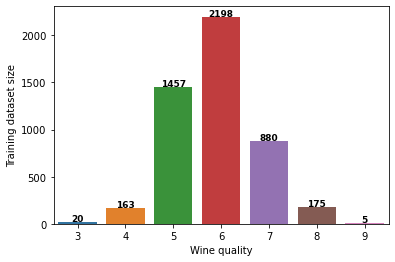

In [7]:
quality_dict = {}
for name,group in wine_quality_df.groupby('quality'):
    quality_dict[name] = len(group)

quality_dict

x = list(quality_dict.keys())
y = list(quality_dict.values())
ax = sns_plot = sns.barplot(x, y)

start = 0
for k,v, in quality_dict.items():

    sns_plot.annotate(v,
                      xy=(start, v +35),
                      ha='center',
                      va='center',
                      color = 'black',
                      fontweight='bold',
                      size= 9)
    start = start + 1
ax.set(xlabel='Wine quality', ylabel='Training dataset size')
plt.show()

In [8]:
wine_quality_df['quality_label']=wine_quality_df['quality'].apply(lambda x: 'low' if x<=5 else 'medium' if x<=7 else 'high')

In [9]:
train_df, test_df = train_test_split(wine_quality_df,
                                     test_size = 0.2,
                                     random_state = 42)

train_df.reset_index(drop = True,
                     inplace = True)
test_df.reset_index(drop = True,
                    inplace = True)
print("Training set: {}".format(train_df.shape))
print("Testing set: {}".format(test_df.shape))

Training set: (3918, 13)
Testing set: (980, 13)


C:\Users\Hp\Anaconda2\envs\ml_assignment1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


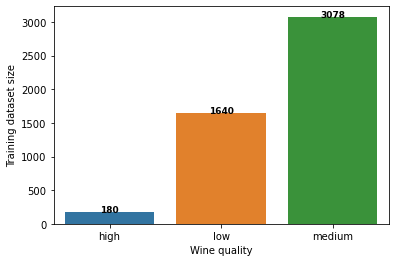

In [10]:
quality_dict = {}
for name,group in wine_quality_df.groupby('quality_label'):
    quality_dict[name] = len(group)

quality_dict

x = list(quality_dict.keys())
y = list(quality_dict.values())
ax = sns_plot = sns.barplot(x, y)

start = 0
for k,v, in quality_dict.items():

    sns_plot.annotate(v,
                      xy=(start, v +35),
                      ha='center',
                      va='center',
                      color = 'black',
                      fontweight='bold',
                      size= 9)
    start = start + 1
ax.set(xlabel='Wine quality', ylabel='Training dataset size')
plt.show()

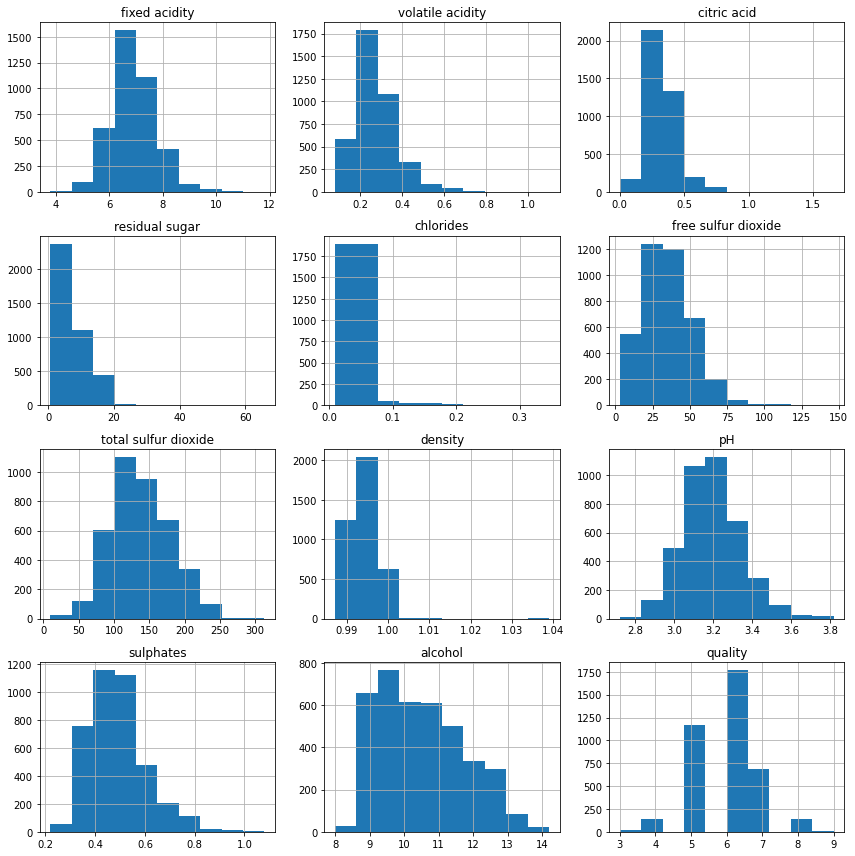

In [11]:
plt.rcParams["figure.figsize"] = [12,12]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(4, 3)

train_df.hist('fixed acidity',
              ax=axes[0][0])
train_df.hist('volatile acidity',
              ax=axes[0][1])
train_df.hist('citric acid',
              ax=axes[0][2])

train_df.hist('residual sugar',
              ax=axes[1][0])
train_df.hist('chlorides',
              ax=axes[1][1])
train_df.hist('free sulfur dioxide',
              ax=axes[1][2])

train_df.hist('total sulfur dioxide',
              ax=axes[2][0])
train_df.hist('density',
              ax=axes[2][1])
train_df.hist('pH',
              ax=axes[2][2])

train_df.hist('sulphates',
              ax=axes[3][0])
train_df.hist('alcohol',
              ax=axes[3][1])
train_df.hist('quality',
              ax=axes[3][2])

plt.show()

In [39]:
wine_quality_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

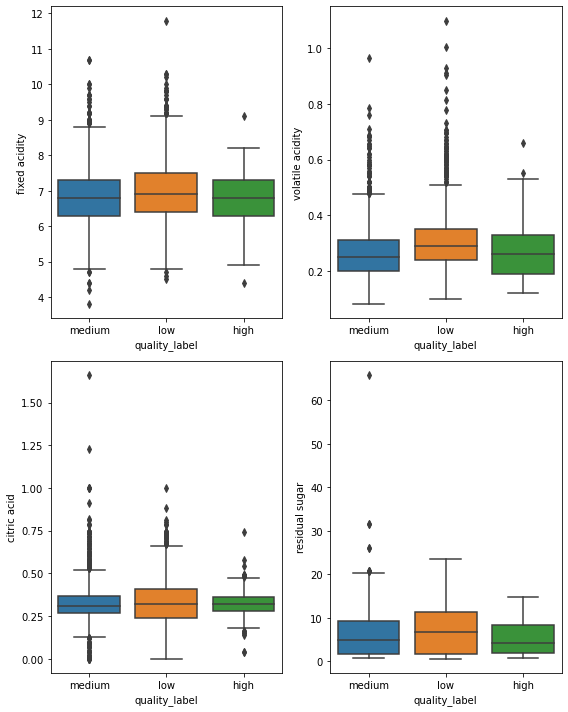

In [47]:
fig, axarr = plt.subplots(2, 2, figsize=(8,10))
sns.boxplot(x='quality_label',
            y='fixed acidity',
            data=train_df,
            ax = axarr[0][0])
sns.boxplot(x='quality_label',
            y='volatile acidity',
            data=train_df,
            ax = axarr[0][1])
sns.boxplot(x='quality_label',
            y='citric acid',
            data=train_df,
            ax = axarr[1][0])
sns.boxplot(x='quality_label',
            y='residual sugar',
            data=train_df,
            ax = axarr[1][1])
plt.show()